# 도형 컬렉션 (Geometry Collections)

---

```{figure} ./img/multipolygons.svg
---
height: 300px
---
<i>Tyrol</i> (오스트리아의 연방주)은 다중 다각형(MultiPolygon) 입니다 (그림 출처: <a href="https://data.statistik.gv.at/web/meta.jsp?dataset=OGDEXT_GEM_1">Statistics Austria</a>).
```

&emsp;분석 사례에 따라, 하나의 특성(feature)에 여러 도형(예. 여러 점 또는 다각형)을 저장하는 것이 유용합니다. 예를 들어, 위 그림과 같이 Tyrol 지역은 두 개의 다각형으로 구성된 지역입니다. 두 다각형은 동일한 속성(예. 지역 명, 인구 수 등)을 공유합니다. 따라서, 두 다각형을 각각 특성으로 저장하는 것은 의미가 없습니다. 즉, 별도의 행으로 저장할 필요없이 여러 개의 다각형으로 구성된 `MultiPolygon`으로 표현하여 Tyrol 지역을 하나의 행(단일 특성)으로 나타낼 수 있습니다.  

&emsp;Shapely에서 점(point)의 컬렉션은 `MultiPoint`, 선(line) 컬렉션은 `MultiLineString`, 다각형(polygon) 컬렉션은 `MultiPolygon`으로 구현됩니다.  

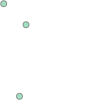

In [5]:
from shapely.geometry import Point, LineString, MultiPoint, MultiLineString

# Point 객체 생성
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

# MultiPoint 객체 생성
multipoint = MultiPoint([point1, point2, point3])
multipoint

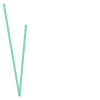

In [3]:
# LineString 객체 생성
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])

# MultiLineString 객체 생성
multiline = MultiLineString([line1, line2])
multiline

In [4]:
print(multipoint)
print(multiline)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


&emsp;`MultiPolygon`도 유사한 방식으로 구성할 수 있습니다. 먼저, 다각형 하나를 생성해 줍니다.

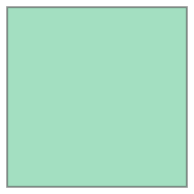

In [6]:
from shapely.geometry import Polygon, MultiPolygon

left = Polygon([(-180, 90), (-180, -90), (0, -90), (0, 90)])
left

In [7]:
print(left)

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90))


&emsp;Shapely에는 직사각형 형태의 "상자"를 만드는 함수 `box`가 있습니다. `box` 함수는 x, y 좌표의 최소, 최대값을 사용하여 경계 상자(bounding box)를 생성합니다. 두 번째 다각형을 만드는 데 [`shapely.geometry.box()`](https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.box)를 사용해 보겠습니다.  

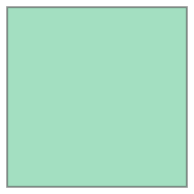

In [8]:
from shapely.geometry import box
min_x = 0
max_x = 180
min_y = -90
max_y = 90

right = box(min_x, min_y, max_x, max_y)
right

In [9]:
print(right)

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


&emsp;마지막으로, 두 다각형 `left`, `right`를 `MultiPolygon`으로 결합할 수 있습니다.  

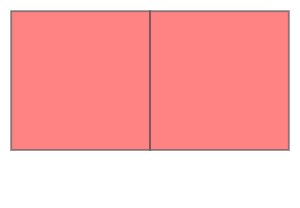

In [10]:
# MultiPolygon 생성
multipolygon = MultiPolygon([left, right])
multipolygon

In [11]:
print(multipolygon)

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


---

```{raw} html
<script src="https://utteranc.es/client.js"
        repo="Kwan-Gu/geospatial_analysis"
        issue-term="pathname"
        theme="preferred-color-scheme"
        crossorigin="anonymous"
        async>
</script>
```